In [1]:
import graph_tool as gt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from graph_tool.all import random_rewire, vertex_hist


def rich_club_coefficient(g, normed=True):
    deghist = vertex_hist(g, 'total')[0]
    total = deghist.sum()
    rc = {}
    # Compute the number of nodes with degree greater than `k`, for each
    # degree `k` (omitting the last entry, which is zero).
    nks = (total - cs for cs in np.cumsum(deghist) if total - cs > 1)
    deg = g.degree_property_map('total')
    for k, nk in enumerate(nks):
        if nk == 0:
            continue
        sub_g = gt.GraphView(g, vfilt=lambda v: deg[v] > k)
        ek = sub_g.num_edges()
        rc[k] = 2 * ek / (nk * (nk - 1))

    if normed:
        g_copy = g.copy()
        random_rewire(g_copy, n_iter=1000)
        rc_norm = rich_club_coefficient(g_copy, normed=False)
        for k in rc_norm.keys():
            if rc_norm[k]:
                rc[k] /= rc_norm[k]
            else:
                rc[k] = 1
    return rc

In [4]:
from graph_tool.all import vertex_hist

def analyze_graph(path):
    g = gt.load_graph(str(path))
    g.set_directed(False)

    print('Graph loaded.')
    print(f'|V|: {g.num_vertices()}, |E|: {g.num_edges()}')
    
    # node degree distribution
    counts, bins = vertex_hist(g, 'total')
    bins = bins[:-1]
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins, counts / counts.sum(), 'o')
    ax.set_title('Node Degree Distribution')
    ax.set_xlabel('$k$')
    fig.savefig(path.stem + '-node-degree-distribution.png')
    
    # avg degree
    print(f'Average degree: {np.average(bins, weights=counts)}')
    
    # average path length
    #sp_dist = gt.all.shortest_distance(g)
    #avg_path_len = sp_dist.sum() / (g.num_vertices() - 1) / g.num_vertices()
    #print(f'Average path length: {avg_path_len}')
    
    print(f'Diameter: {gt.topology.pseudo_diameter(g)}')
    
    print(f'Assortativity: {gt.correlations.scalar_assortativity(g, "total")}')
    
    # clustering coefficient
    deg = g.degree_property_map('total').a
    local_clustering = gt.all.local_clustering(g).a
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(deg, local_clustering, 'o')
    ax.set_title('Clustering coefficient distribution')
    fig.savefig(path.stem + '-clustering-coefficient-distribution.png')
    
    # average clustering coefficient
    avg_clustering_coeff = np.mean(local_clustering)
    print(f'Average clustering coefficient: {avg_clustering_coeff}')
    
    # rich club coefficient
    degs = []
    rrcs = []
    for k, v in rich_club_coefficient(g, False).items():
        degs.append(k)
        rrcs.append(v)
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(degs, rrcs, 'o')
    ax.set_title('Rich club coefficient')
    fig.savefig(path.stem + '-rich-club-coefficient.png')

data/uscn_co.xml
Graph loaded.
|V|: 2723671, |E|: 1723671
Average degree: 1.265696921544489
Diameter: (2.0, (<Vertex object with index '0' at 0x7f5390730ed0>, <Vertex object with index '2000000' at 0x7f5390730810>))
Assortativity: (-0.7236709999999994, 0.0042678313287387)


<ipython-input-4-a6cea157e1ce>:41: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.savefig(path.stem + '-clustering-coefficient-distribution.png')


Average clustering coefficient: 0.0
data/us_co.xml
Graph loaded.
|V|: 104524, |E|: 235320
Average degree: 4.502697944969577
Diameter: (20.0, (<Vertex object with index '6874' at 0x7f53906faab0>, <Vertex object with index '59796' at 0x7f53906fa2d0>))
Assortativity: (0.07179760456469986, 0.0036344846338178917)
Average clustering coefficient: 0.4555349083582177
data/cn_co.xml
Graph loaded.
|V|: 497866, |E|: 4823099
Average degree: 19.37508887933701
Diameter: (15.0, (<Vertex object with index '101320' at 0x7f53906fa0f0>, <Vertex object with index '342310' at 0x7f53906fae10>))
Assortativity: (-0.001644308641480643, 0.0004398707193265693)
Average clustering coefficient: 0.642961727383639


KeyboardInterrupt: 

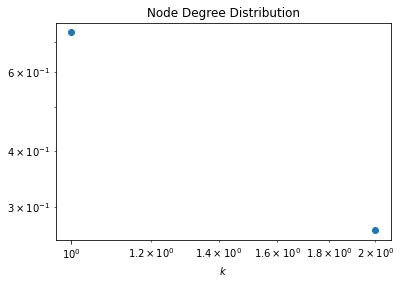

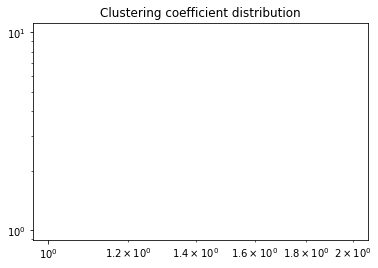

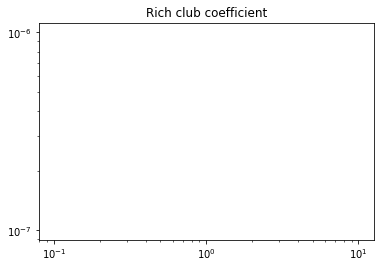

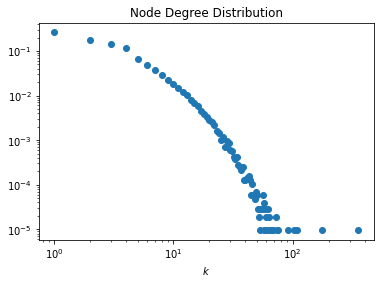

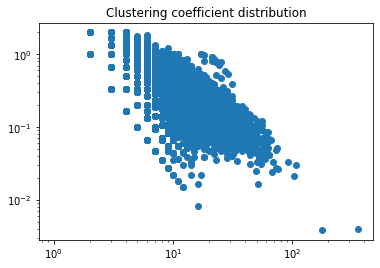

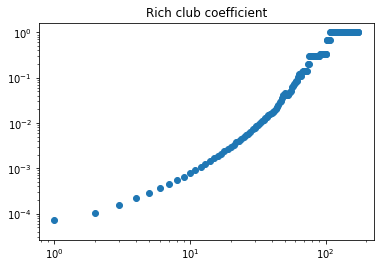

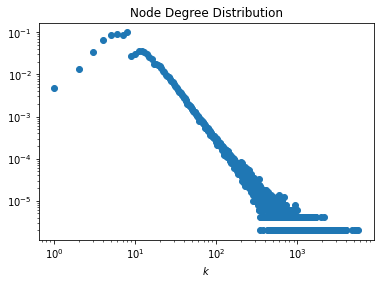

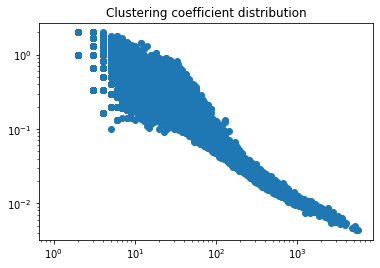

In [7]:
from pathlib import Path

DATA_PATH = 'data/'

for p in Path(DATA_PATH).iterdir():
    print(str(p))
    analyze_graph(p)

In [5]:
from graph_tool.all import graph_draw

graph_draw(g, output='us_cn.png')

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffb0984caf0, at 0x7ffaf73842b0>

In [4]:
g.list_properties()

_graphml_vertex_id (vertex)  (type: string)
author_id      (vertex)  (type: int32_t)
labelV         (vertex)  (type: string)
_graphml_edge_id (edge)    (type: string)
labelE         (edge)    (type: string)
